<a href="https://colab.research.google.com/github/oneicar/ProyectoClase15/blob/main/V3_Tarea_1_Deep_Learning_Oneicar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot
from keras.models import load_model
from matplotlib import pyplot
from pandas import DataFrame
from keras.layers import Dropout


In [3]:
import pandas as pd
url = ("https://drive.google.com/file/d/1Z3XPdnSdergK9kLjG50YXdL2he-Nr8Ok/view?usp=sharing")
df =  pd.read_csv(url)
print =(df.head (10))

In [44]:
# generate 2d classification dataset
X, y = make_moons(n_samples=4000, noise=0.07, random_state=0)

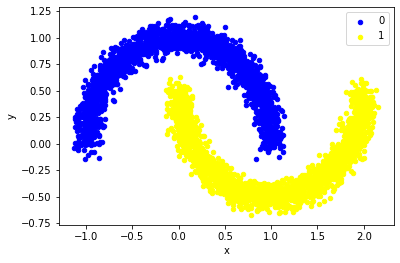

In [45]:
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'blue', 1:'yellow'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

**Conjunto de train y test:**

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**Escalado de variables:**

In [48]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

**Red Neuronal Artificial (RNA)**

In [49]:
from keras.models import Sequential
from keras.layers import Dense

In [53]:
model = Sequential()
model.add(Dense(8, activation = "tanh", input_shape =(X.shape[1],)))
model.add(Dense(8, activation="tanh")) 
model.add(Dense(8, activation="tanh")) 
model.add(Dense(8, activation="tanh")) 
model.add(Dense(8, activation="tanh")) 
model.add(Dense(1, activation = "softmax"))
model.compile(loss = "binary_crossentropy", 
              optimizer = "sgd", metrics = ["accuracy"])

In [54]:
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    batch_size = 20,
                    epochs = 1000, 
                    verbose = 0)

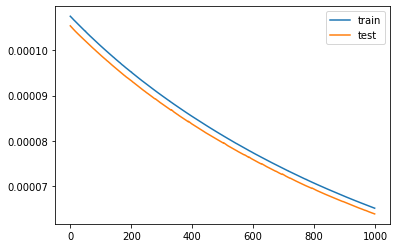

In [55]:
# fit model
history = model.fit(X_train,y_train, validation_data=(X_test,  y_test), epochs=1000, verbose=0)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

**Evaluación del desempeño:**

In [56]:
model.evaluate(X_test, y_test, verbose = 0)

[6.388854671968147e-05, 0.4891666769981384]

In [57]:
import matplotlib.pyplot as plt

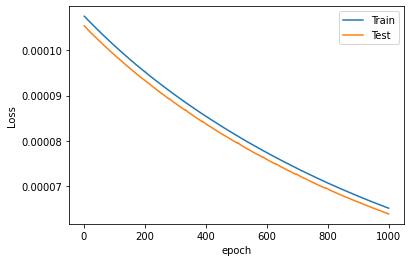

In [58]:
plt.plot(range(1, len(history.epoch) + 1), history.history["loss"], label="Train")
plt.plot(range(1, len(history.epoch) + 1), history.history["val_loss"], label="Test")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend();

In [59]:
y_pred = model.predict(X_test, verbose = 0)
y_pred[0:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

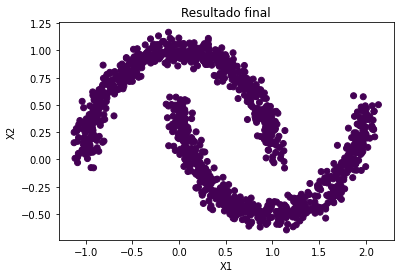

In [60]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Resultado final");

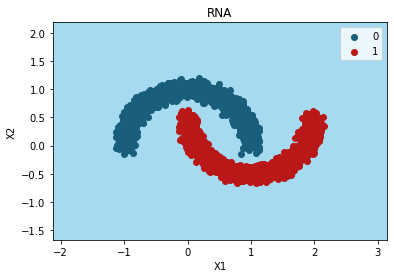

In [61]:
from matplotlib.colors import ListedColormap

X_Set, y_Set = X, y
X1, X2 = np.meshgrid(
    np.arange(start=X_Set[:, 0].min() - 1, stop=X_Set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_Set[:, 1].min() - 1, stop=X_Set[:, 1].max() + 1, step=0.01),
)
plt.contourf(
    X1,
    X2,
    model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(("skyblue", "#F3B3A9")),
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_Set)):
    plt.scatter(
        X_Set[y_Set == j, 0],
        X_Set[y_Set == j, 1],
        c=ListedColormap(("#195E7A", "#BA1818"))(i),
        label=j,
    )
plt.title("RNA")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

In [62]:
y_pred = np.round(model.predict(X_test, verbose = 0))
y_pred[0:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

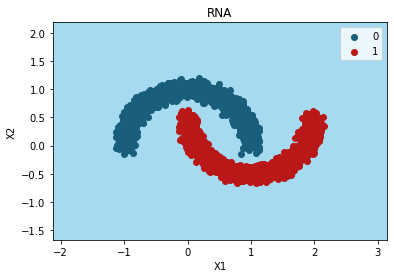

In [63]:
from matplotlib.colors import ListedColormap

X_Set, y_Set = X, y
X1, X2 = np.meshgrid(
    np.arange(start=X_Set[:, 0].min() - 1, stop=X_Set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_Set[:, 1].min() - 1, stop=X_Set[:, 1].max() + 1, step=0.01),
)
plt.contourf(
    X1,
    X2,
    model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(("skyblue", "#F3B3A9")),
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_Set)):
    plt.scatter(
        X_Set[y_Set == j, 0],
        X_Set[y_Set == j, 1],
        c=ListedColormap(("#195E7A", "#BA1818"))(i),
        label=j,
    )
plt.title("RNA")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()